In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# Part 1: Data Exploration

In [33]:
url = 'https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_hour.csv'
df = pd.read_csv(url)

In [34]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
df = df.drop(columns=['dteday','instant'])
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


In [37]:
categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weathersit', 'weekday', 'workingday']
df[categorical] = df[categorical].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


In [38]:
null = df.isnull().sum()
null_percentage = (null / len(df)) * 100

print(null)
print(null_percentage)

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [39]:
season_months = df.groupby(['season', 'mnth']).size().reset_index(name='count')
season_months.sort_values(by='season')

,season,mnth,count
0,1,1,1429
11,1,12,523
10,1,11,0
9,1,10,0
7,1,8,0
6,1,7,0
8,1,9,0
4,1,5,0
3,1,4,0
2,1,3,949


season: (1:spring, 2:summer, 3:fall, 4:winter)

Based on what's provided in the readme file, the season's don't appear to align with the months. For example, the months I would assume for Winter are December, January & February but in the data there are non-zero counts for September & October. The same pattern is noticeable in Fall, where June, July & August have non-zero counts when these months align with summer. There appears to be a misalignment between the season & month columns. 

In [40]:
df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


As mentioned in the readme file, temp, atemp, hum & windspeed have been normalized on a scale from 0 to 1. For "temperature" and "feels like temperature", the 0 represents the lowest temperature & 1 the highest. The same applies to humidity. Windspeed has been normalized as well, but the maximum windspeed remains below 1. There is significant variability in casual and registered users, as well as count.

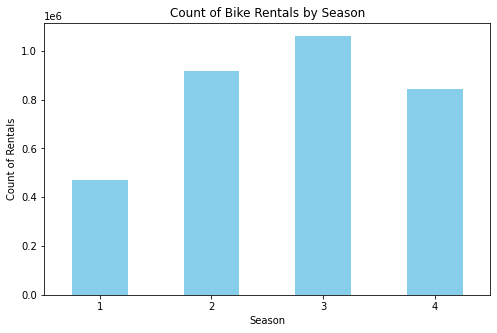

In [41]:
season_counts = df.groupby('season')['cnt'].sum()

plt.figure(figsize=(8, 5))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=0) 
plt.show()

The higest bike rentals are during Fall, followed by Summer. Spring had the lowest number of rentals, which is surprising as I assumed Winter would have the least amount of rentals - Winter has almost twice the amount of rentals compared to spring. 

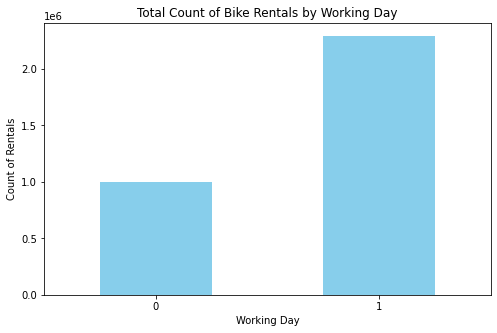

In [42]:
workingday_counts = df.groupby('workingday')['cnt'].sum()

plt.figure(figsize=(8, 5))
workingday_counts.plot(kind='bar', color='skyblue')
plt.title('Total Count of Bike Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=0) 
plt.show()

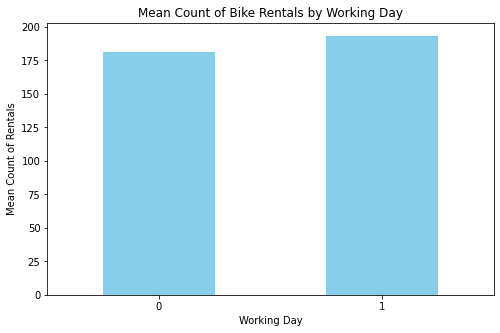

In [43]:
workingday_mean = df.groupby('workingday')['cnt'].mean()

plt.figure(figsize=(8, 5))
workingday_mean.plot(kind='bar', color='skyblue')
plt.title('Mean Count of Bike Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Mean Count of Rentals')
plt.xticks(rotation=0) 
plt.show()

working day = 1, non-working day = 0

When looking at the sum of bike rentals by working day, we can look at the total rental volume of bike rentals on working days vs non working days. Looking at the bar chart in this scenario, it appears there are twice as many bike rentals on working days compared to non-working days. However, when we look at the mean, these numbers appear similar. But, this is misleading as the number of non-working days (weekends, holidays) are fewer than working days, so the bar chart doesn't represent the true distribution. Overall, the sum is a better representation.

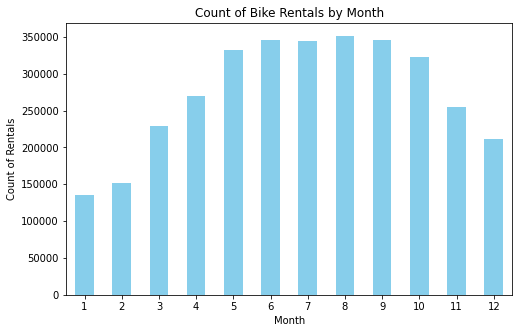

In [44]:
month_counts = df.groupby('mnth')['cnt'].sum()

plt.figure(figsize=(8, 5))
month_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=0) 
plt.show()

Based on the chart, the highest number of rentals are during Summer & Fall months followed by Spring with Winter having the least amount of rentals. These results are expected based on my intuition. 

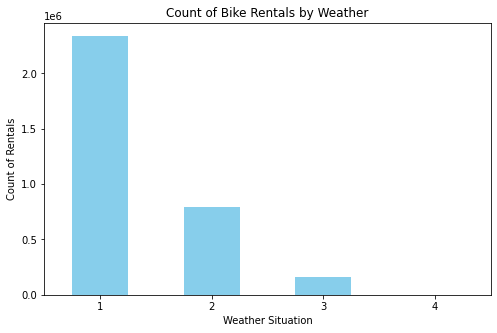

In [45]:
weather_counts = df.groupby('weathersit')['cnt'].sum()

plt.figure(figsize=(8, 5))
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Bike Rentals by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=0) 
plt.show()

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
The count of bike rentals by weather situation makes sense, as clear days had the most rentals and severe weather with rain had none. The number of bike rentals reduced by weather severity.

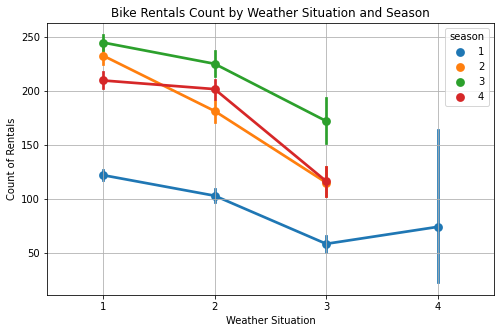

In [46]:
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='weathersit', y='cnt', hue='season')
plt.title('Bike Rentals Count by Weather Situation and Season')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Rentals')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Across all seasons, clear weather had the most bike rentals, and bike rentals are consistently higer in summer months and lowest during Winter across all weather conditions. 

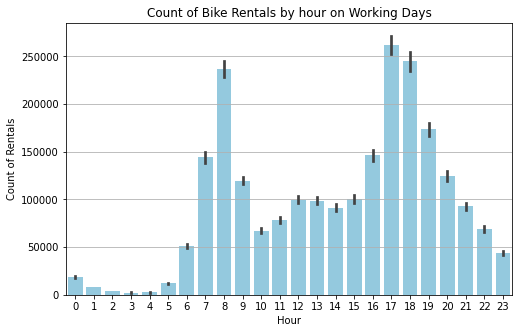

In [47]:
workingday = df[df['workingday'] == 1]

plt.figure(figsize=(8, 5))
sns.barplot(data=workingday, x='hr', y='cnt', estimator=np.sum, color='skyblue')
plt.title('Count of Bike Rentals by hour on Working Days')
plt.xlabel('Hour')
plt.ylabel('Count of Rentals')
plt.grid(axis='y')
plt.show()

As expected, the peak hours for bike rentals are the hours close to 8 am and 5 pm which are aligned with commuting hours for traditional work which is typically 9 am to 5 pm

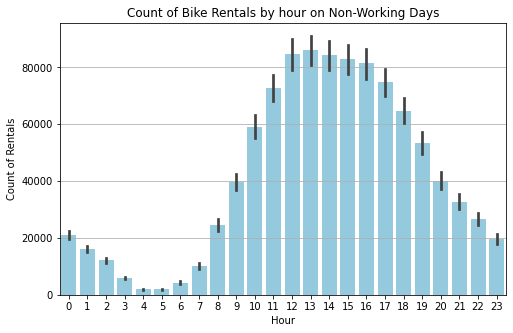

In [48]:
nonworkingday = df[df['workingday'] == 0]

plt.figure(figsize=(8, 5))
sns.barplot(data=nonworkingday, x='hr', y='cnt', estimator=np.sum, color='skyblue')
plt.title('Count of Bike Rentals by hour on Non-Working Days')
plt.xlabel('Hour')
plt.ylabel('Count of Rentals')
plt.grid(axis='y')
plt.show()

Compared to working days which had peaks at 8 am and 5 pm, there is a normal distrubution on non working days which peaks at 1 pm. This is expected as people may plan activities later in the day on non-work days, and aligns with leisurely evenings

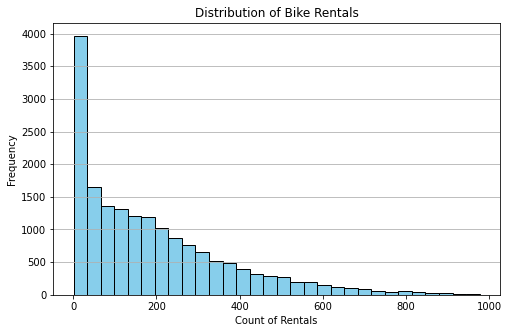

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(df['cnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Bike Rentals')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

There is a right skew, where most of the bike rentals are on the lower end with fewer high rental counts, which is expected

# Part 2: Data Preparation

In [50]:
df.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


Temperature & feels like temperature (atemp) are highly correlated at 0.99, which intuitively makes sense. Count and registered are highly correlated at 0.97, which is also as expected. Casual and count are also correlated at 0.69

In [51]:
df = df.drop(columns=['casual','registered','atemp'])
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [52]:
X = df.drop(columns=['cnt'])  
y = df['cnt']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Training:", X_train.shape)
print("Testing:", X_test.shape)

Training: (11643, 11)
Testing: (5736, 11)


# Part 3: Baseline Model Construction

In [53]:
model = LinearRegression()

scoring = {
    'r2': make_scorer(r2_score), 
    'neg_root_mean_squared_error': make_scorer(mean_squared_error, squared=False, greater_is_better=False) 
}

cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

print("Cross-Validation R-squared scores:", cv_results['test_r2'])
print("Mean R-squared score:", cv_results['test_r2'].mean())
print("\nCross-Validation Negative RMSE scores:", cv_results['test_neg_root_mean_squared_error'])
print("Mean Negative RMSE score:", cv_results['test_neg_root_mean_squared_error'].mean())

Cross-Validation R-squared scores: [0.36909082 0.37637528 0.41223316 0.3724235  0.39175027]
Mean R-squared score: 0.3843746042921682

Cross-Validation Negative RMSE scores: [-143.13221435 -140.5758603  -141.95658007 -148.18085304 -142.5381997 ]
Mean Negative RMSE score: -143.27674149092712


In [54]:
mean_r2 = cv_results['test_r2'].mean()
mean_rmse = -cv_results['test_neg_root_mean_squared_error'].mean()

print("Avg R-squared over 5 folds:", mean_r2)
print("Avg RMSE over 5 folds:", mean_rmse)

Avg R-squared over 5 folds: 0.3843746042921682
Avg RMSE over 5 folds: 143.27674149092712


# Part 4: Initial Model Training

In [55]:
dummy_df = pd.get_dummies(df, drop_first=True, dtype=int)

print("dummy_df shape:", dummy_df.shape)
print("dummy_df cols:", dummy_df.columns)

dummy_df shape: (17379, 53)
dummy_df cols: Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')


In [62]:
X = dummy_df.drop(columns=['cnt']) 
y = dummy_df['cnt']

X_train_dummy, X_test_dummy, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11643, 52)
X_test shape: (5736, 52)
y_train shape: (11643,)
y_test shape: (5736,)


In [63]:
model = LinearRegression()

scoring = {
    'r2': 'r2',
    'neg_rmse': make_scorer(mean_squared_error, squared=False)
}

cv_results = cross_validate(
    model, X_train, y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False
)

avg_r2 = np.mean(cv_results['test_r2'])
avg_rmse = -np.mean(cv_results['test_neg_rmse'])

print(f"Avg R-squared over 5 folds: {avg_r2}")
print(f"Avg RMSE over 5 folds: {avg_rmse}")

Avg R-squared over 5 folds: 0.6849869637915675
Avg RMSE over 5 folds: -102.4724349781998


Introducing dummy variables enhanced the model significantly. The R squared value increased from 0.38 to 0.68, and RMSE decreased from 143 to 102

In [65]:
dt_regressor = DecisionTreeRegressor(random_state=0)

scoring = {
    'r2': 'r2',
    'neg_rmse': make_scorer(mean_squared_error, squared=False)
}

cv_results = cross_validate(
    dt_regressor, X_train_dummy, y_train, 
    cv=5, scoring=scoring, 
    return_train_score=False
)

avg_r2 = np.mean(cv_results['test_r2'])
avg_rmse = -np.mean(cv_results['test_neg_rmse']) 

print(f"Avg R-squared over 5 folds: {avg_r2}")
print(f"Avg RMSE over 5 folds: {avg_rmse}")

Avg R-squared over 5 folds: 0.8010669312409169
Avg RMSE over 5 folds: -81.45906891826067


In [68]:
rf_regressor = RandomForestRegressor(random_state=0)

scoring = {
    'r2': 'r2',
    'rmse': make_scorer(mean_squared_error, squared=False)
}

cv_results = cross_validate(
    rf_regressor, X_train_dummy, y_train,
    cv=5, scoring=scoring,
    return_train_score=False
)

avg_r2 = np.mean(cv_results['test_r2'])
avg_rmse = np.mean(cv_results['test_rmse'])

print(f"Avg R-Squared over 5 folds: {avg_r2}")
print(f"Avg RMSE over 5 folds: {avg_rmse}")

Avg R-Squared over 5 folds: 0.9024079984427207
Avg RMSE over 5 folds: 57.03259666992058


In [73]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "Average R-Squared": [0.685, 0.801, 0.902],
    "Average RMSE": [102.47, 81.46, 57.03]
}

results_df = pd.DataFrame(results)

print(results_df)

               Model  Average R-Squared  Average RMSE
0  Linear Regression              0.685        102.47
1      Decision Tree              0.801         81.46
2      Random Forest              0.902         57.03


# Part 5: Model Tuning

In [74]:
rf_regressor = RandomForestRegressor(random_state=0)

param_dist = {
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 150, 200, 250]
}

random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=0,
    n_jobs=-1 
)

random_search.fit(X_train_dummy, y_train)

best_params = random_search.best_params_
best_score = -random_search.best_score_ 

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

Best Parameters: {'n_estimators': 200, 'max_features': 1.0, 'max_depth': 35}
Best RMSE: 56.98288311569655


In [75]:
scoring = {
    'r2': make_scorer(r2_score),
    'rmse': make_scorer(mean_squared_error, squared=False)
}

best_rf_model = random_search.best_estimator_

cv_results = cross_validate(
    best_rf_model, X_train_dummy, y_train,
    cv=5, scoring=scoring, return_train_score=False
)

avg_r2_best_rf = np.mean(cv_results['test_r2'])
avg_rmse_best_rf = np.mean(cv_results['test_rmse'])

print(f"Average R-Squared (Optimized Random Forest): {avg_r2_best_rf:.4f}")
print(f"Average RMSE (Optimized Random Forest): {avg_rmse_best_rf:.4f}")

Average R-Squared (Optimized Random Forest): 0.9026
Average RMSE (Optimized Random Forest): 56.9829


The optimized random forest model performned better as it has the highest R squared value of 0.90 and the lowest RMSE at 56.98. This shows that the model explains more variance than in the default model and it also better minimizes prediction error compared to the defautl model. 

In [76]:
y_pred = best_rf_model.predict(X_test_dummy)

r2_test = r2_score(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-Squared Score (Test Set, Optimized Random Forest): {r2_test}")
print(f"RMSE (Test Set, Optimized Random Forest): {rmse_test}")

R-Squared Score (Test Set, Optimized Random Forest): 0.9122474729724788
RMSE (Test Set, Optimized Random Forest): 52.90966717185762


Overall, the random forest regressor (5) significantly improved it's performance over the default settings (4). It shows the highests R squared and lowest RMSE on the test set. 